# Question 1

1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [46]:
# impoort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

In [47]:
# import dataset
delivery = pd.read_csv("C:/Users/Shubham Tiwari/Downloads/delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [48]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


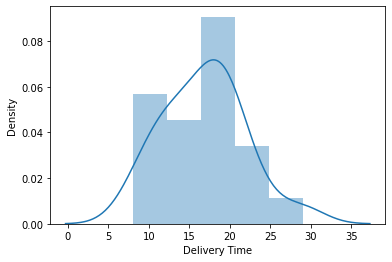

In [49]:
sns.distplot(delivery['Delivery Time']);

C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


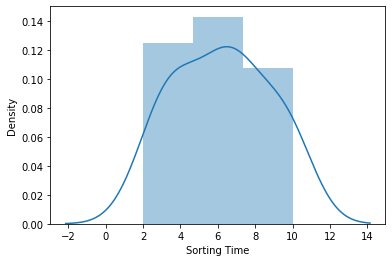

In [50]:
sns.distplot(delivery['Sorting Time']);

# Feature Engineering

In [51]:
# Renaming Columns
data=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation Analysis

In [52]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


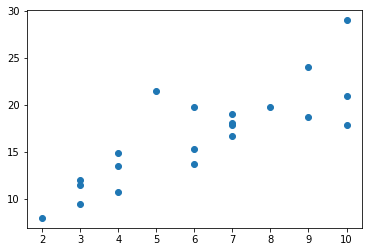

In [53]:
x = data['sorting_time'];
y = data['delivery_time'];
plt.scatter(x,y);
plt.plot(x,y,'.');

C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


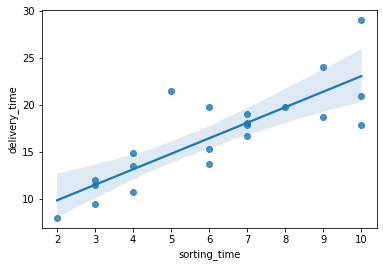

In [54]:
sns.regplot(x,y,data=data);

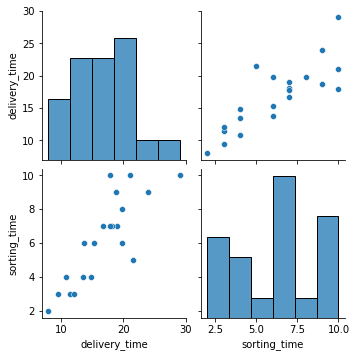

In [55]:
sns.pairplot(data);

# Model Building

In [56]:
model=smf.ols('delivery_time~sorting_time',data=data).fit()
model

# Model Testing

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        18:27:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model.params, model.params,model.pvalues

(Intercept       6.582734
 sorting_time    1.649020
 dtype: float64,
 Intercept       6.582734
 sorting_time    1.649020
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [59]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [60]:
np.sqrt(model.rsquared)

0.8259972607955326

# Model Testing (Log)

In [61]:
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data = data).fit()
model2

In [62]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 28 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                           18:27:29   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model2.params, model2.tvalues, model2.pvalues

(Intercept               1.741987
 np.log(sorting_time)    0.597522
 dtype: float64,
 Intercept               13.085552
 np.log(sorting_time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(sorting_time)    1.601539e-07
 dtype: float64)

In [64]:
model2.rsquared,model2.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# Model Testing (Square)

In [65]:
model3 = smf.ols("delivery_time~np.square(sorting_time)",data = data).fit()
model3

In [66]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.74e-05
Time:                        18:27:34   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing (Square root)

In [67]:
model4 = smf.ols("delivery_time~np.sqrt(sorting_time)",data = data).fit()
model4

In [68]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.61e-06
Time:                        18:27:36   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model4.params, model4.tvalues, model4.pvalues

(Intercept               -2.518837
 np.sqrt(sorting_time)    7.936591
 dtype: float64,
 Intercept               -0.840911
 np.sqrt(sorting_time)    6.592434
 dtype: float64,
 Intercept                0.410857
 np.sqrt(sorting_time)    0.000003
 dtype: float64)

In [70]:
model4.rsquared, model4.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

# Model Prediction

In [71]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [72]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [73]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [74]:
model2.predict(data_pred)

0    2.703662
1    2.984500
dtype: float64

In [75]:
model3.predict(data_pred)

0    14.358958
1    19.228893
dtype: float64

In [76]:
model4.predict(data_pred)

0    15.227920
1    19.929232
dtype: float64

In [77]:
pred = model.predict(data)
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [78]:
pred2 = model2.predict(data)
pred2.head()

0    3.117833
1    2.570329
2    2.812603
3    3.054878
4    3.117833
dtype: float64

In [79]:
pred3 = model3.predict(data)
pred3.head()

0    23.724217
1    13.235127
2    15.732529
3    21.351685
4    23.724217
dtype: float64

In [80]:
pred4 = model4.predict(data)
pred4.head()

0    22.578867
1    13.354345
2    16.921761
3    21.290936
4    22.578867
dtype: float64

In [81]:
data1=pd.concat([data,pred,pred2,pred3,pred4],axis=1)
data1

,delivery_time,sorting_time,0,1,2,3
0,21.00,10,23.072933,3.117833,23.724217,22.578867
1,13.50,4,13.178814,2.570329,13.235127,13.354345
2,19.75,6,16.476853,2.812603,15.732529,16.921761
3,24.00,9,21.423913,3.054878,21.351685,21.290936
4,29.00,10,23.072933,3.117833,23.724217,22.578867
5,15.35,6,16.476853,2.812603,15.732529,16.921761
6,19.00,7,18.125873,2.904712,17.355841,18.479409
7,9.50,3,11.529794,2.398432,12.361036,11.227742
8,17.90,10,23.072933,3.117833,23.724217,22.578867
9,18.75,9,21.423913,3.054878,21.351685,21.290936


In [82]:
delivery_pred = data1.rename({0:'model',1:'log',2:'square',3:'square root'},axis=1)
delivery_pred

,delivery_time,sorting_time,model,log,square,square root
0,21.00,10,23.072933,3.117833,23.724217,22.578867
1,13.50,4,13.178814,2.570329,13.235127,13.354345
2,19.75,6,16.476853,2.812603,15.732529,16.921761
3,24.00,9,21.423913,3.054878,21.351685,21.290936
4,29.00,10,23.072933,3.117833,23.724217,22.578867
5,15.35,6,16.476853,2.812603,15.732529,16.921761
6,19.00,7,18.125873,2.904712,17.355841,18.479409
7,9.50,3,11.529794,2.398432,12.361036,11.227742
8,17.90,10,23.072933,3.117833,23.724217,22.578867
9,18.75,9,21.423913,3.054878,21.351685,21.290936
